🎯 Model Accuracy: 96.07%

❌ Error Rate: 3.93%
📊 Classification Report:
                   precision    recall  f1-score   support

        Aleovera       1.00      1.00      1.00        12
           Apple       0.95      0.95      0.95        20
        Arecanut       1.00      0.93      0.97        15
     Ashwagandha       1.00      1.00      1.00        25
           Bajra       1.00      1.00      1.00        21
          Banana       0.96      1.00      0.98        22
        Beetroot       1.00      0.93      0.96        29
       Blackgram       0.94      1.00      0.97        15
         Brinjal       1.00      0.95      0.97        19
        Broccoli       1.00      1.00      1.00        18
Button Mushrooms       0.71      0.71      0.71        21
         Cabbage       1.00      1.00      1.00        15
        Capsicum       0.83      1.00      0.90        19
          Carrot       1.00      1.00      1.00        20
      Cashewnuts       0.91      0.87      0.89        23

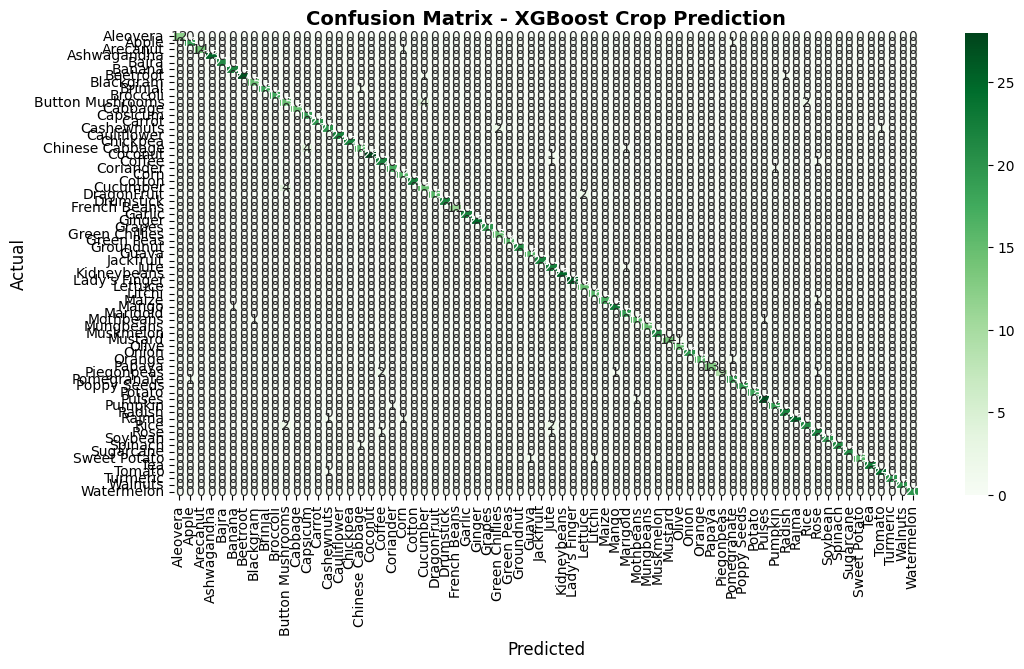

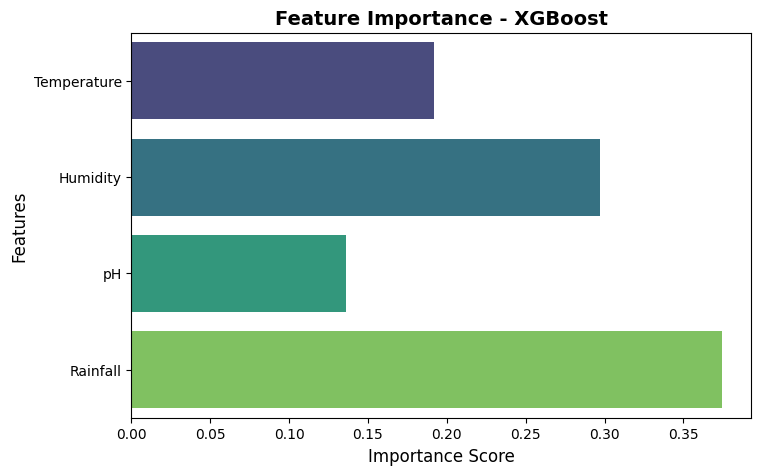

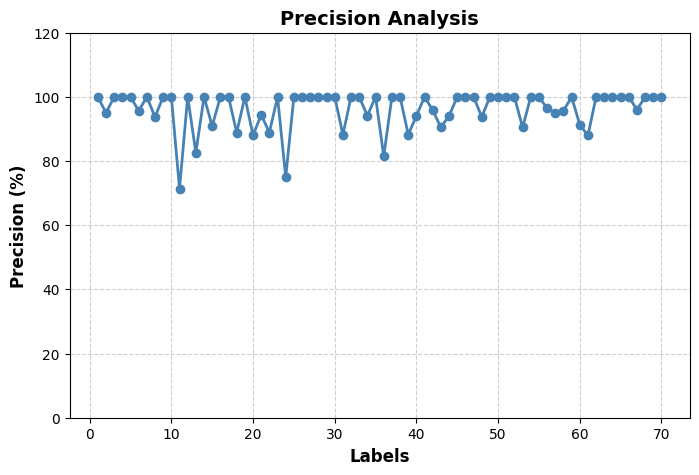

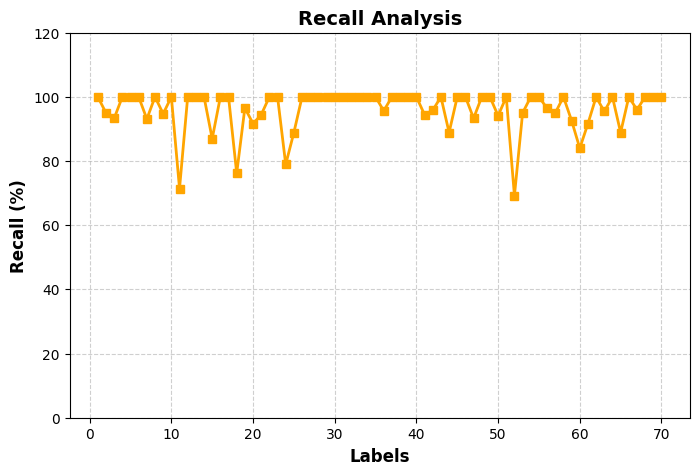

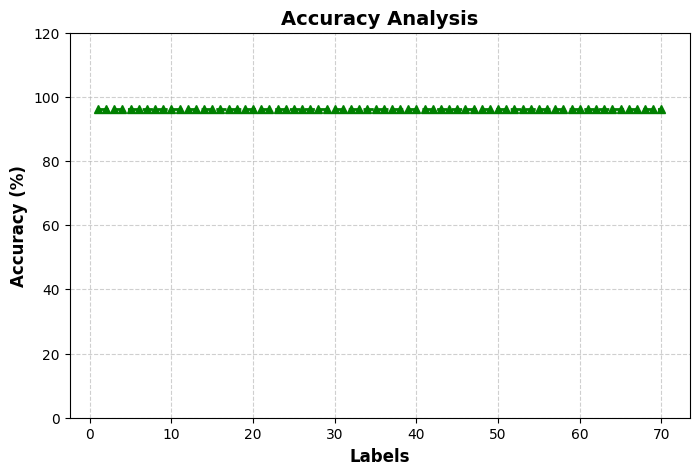

✅ Overall Accuracy of Model: 96.07%

--- 🌾 Enter Soil and Climate Details ---


In [ ]:
# 🌱 Crop Recommendation using XGBoost (Clean Version)
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

# 1️⃣ Load dataset
df = pd.read_csv("Dataset 3.csv")

# 2️⃣ Split features (X) and target (y)
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]  

# 3️⃣ Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# 4️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️⃣ Build and train XGBoost model (no warnings)
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss'
)
model.fit(X_train, y_train)

# 6️⃣ Predictions
y_pred = model.predict(X_test)

# 7️⃣ Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Model Accuracy: {accuracy*100:.2f}%\n")
error_rate = 1 - accuracy
print(f"❌ Error Rate: {error_rate*100:.2f}%")
print("📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))



# 8️⃣ Confusion Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix - XGBoost Crop Prediction", fontsize=14, fontweight='bold')
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# 9️⃣ Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=model.feature_importances_, y=X.columns, palette='viridis')
plt.title("Feature Importance - XGBoost", fontsize=14, fontweight='bold')
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()



#  Get classification metrics
report = classification_report(y_test, y_pred, output_dict=True)
labels = range(1, len(le.classes_) + 1)

# Extract per-class metrics
precision = [report[str(i)]['precision'] * 100 for i in range(len(le.classes_))]
recall = [report[str(i)]['recall'] * 100 for i in range(len(le.classes_))]
accuracy_value = accuracy_score(y_test, y_pred) * 100
accuracy = [accuracy_value] * len(le.classes_)

# Get crop names for x-axis
crop_names = le.classes_

#  Plot Precision Analysis
plt.figure(figsize=(8, 5))
plt.plot(labels, precision, marker='o', color='steelblue', linewidth=2)
plt.title("Precision Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Labels", fontsize=12, fontweight='bold')
plt.ylabel("Precision (%)", fontsize=12, fontweight='bold')
plt.ylim(0, 120)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
# Plot Recall Analysis
plt.figure(figsize=(8, 5))
plt.plot(labels, recall, marker='s', color='orange', linewidth=2)
plt.title("Recall Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Labels", fontsize=12, fontweight='bold')
plt.ylabel("Recall (%)", fontsize=12, fontweight='bold')
plt.ylim(0, 120)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#  Plot Accuracy Analysis
plt.figure(figsize=(8, 5))
plt.plot(labels, accuracy, linestyle='--', color='green', linewidth=2, marker='^')
plt.title("Accuracy Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Labels", fontsize=12, fontweight='bold')
plt.ylabel("Accuracy (%)", fontsize=12, fontweight='bold')
plt.ylim(0, 120)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"✅ Overall Accuracy of Model: {accuracy_value:.2f}%")

# 🔟 User Input Prediction
print("\n--- 🌾 Enter Soil and Climate Details ---")
user_input = []
for col in X.columns:
    val = float(input(f"Enter {col}: "))
    user_input.append(val)

# Convert input into DataFrame
user_df = pd.DataFrame([user_input], columns=X.columns)

# Predict crop
pred_crop = le.inverse_transform(model.predict(user_df))[0]
print(f"\n✅ Recommended Crop: {pred_crop}")
